<a href="https://colab.research.google.com/github/shahd1995913/-caesar_cipher/blob/main/International%20Conference%20on%20Telecommunications%202024/linear_regresstion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = {
    "Country": ["Algeria", "Bahrain", "Comoros", "Djibouti", "Egypt", "United Arab Emirates",
                "Palestine", "Iraq", "Saudi Arabia", "Kuwait", "Libya", "Jordan", "Morocco"],
    "Individuals using the Internet (%)": [66.2, 100.0, None, 64.0, 71.9, 100.0, 81.8, 65.0, 100.0, 99.7, 84.3, 86.0, 88.1],
    "Households with Internet access at home (%)": [78.3, 100.0, None, 65.9, 73.0, 99.9, 87.6, 79.8, 99.8, 99.4, None, 90.1, 86.2],
    "Active mobile-broadband subscriptions per 100 inhabitants": [97.1, 135.2, 42.0, 35.9, 61.6, 241.2, 20.1, 47.5, 119.5, 136.6, 120.9, 65.3, 82.6]
}
df = pd.DataFrame(data)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target variable
X = df[["Households with Internet access at home (%)", "Active mobile-broadband subscriptions per 100 inhabitants"]]
y = df["Individuals using the Internet (%)"]

In [65]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Split the data into training, testing, and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_test = model.predict(X_test)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Test): 21.989594394585307


In [69]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Retrieve the coefficients (weights) and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [1.11212744 0.02074547]
Intercept: -15.142870023922711


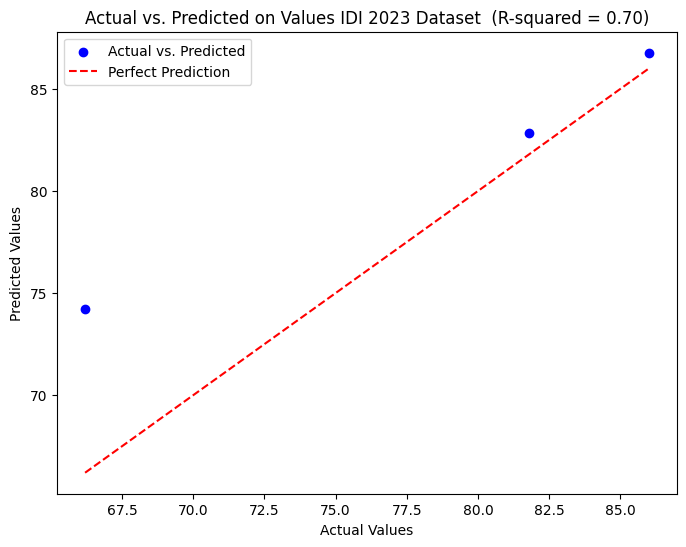

In [72]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_test)
# Plot actual vs. predicted values with additional information
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted on Values IDI 2023 Dataset  (R-squared = {:.2f})'.format(r_squared))
plt.legend()
plt.show()

البيانات التي تم استخدامها في هذا النموذج هي بيانات تتعلق بالاستخدام الإنترنتي والاتصالات في عدد من البلدان. هذه البيانات تشمل معدل الأفراد الذين يستخدمون الإنترنت (%)، معدل الأسر التي تمتلك وصولاً إلى الإنترنت في المنزل (%)، وعدد الاشتراكات النشطة للانترنت المتنقلة لكل 100 شخص في السكان.

1. **Individuals using the Internet (%)**: هذا المتغير يقيس نسبة الأفراد الذين يستخدمون الإنترنت في كل بلد من البلدان المدرجة في البيانات. يعكس هذا المتغير مدى انتشار الإنترنت بين السكان في كل بلد.

2. **Households with Internet access at home (%)**: يقيس هذا المتغير نسبة الأسر التي تمتلك وصولاً إلى الإنترنت في المنزل في كل بلد. يمكن أن يوفر هذا المتغير فكرة عن مدى توفر البنية التحتية للإنترنت في البلد.

3. **Active mobile-broadband subscriptions per 100 inhabitants**: يعكس هذا المتغير عدد الاشتراكات النشطة للانترنت المتنقلة لكل 100 شخص في السكان. يشير هذا إلى مدى انتشار استخدام الإنترنت المتنقل في البلد.

باستخدام هذه البيانات، يمكن للنموذج التنبؤ بنسبة استخدام الإنترنت بناءً على معدلات الأسر التي تمتلك وصولاً إلى الإنترنت في المنزل وعدد الاشتراكات النشطة للانترنت المتنقلة في البلد.

In [61]:
import numpy as np

# Define features and target variable
X = df[["Households with Internet access at home (%)", "Active mobile-broadband subscriptions per 100 inhabitants"]]
y = df["Individuals using the Internet (%)"]

# Add a column of ones to X for the intercept term
X_with_intercept = np.column_stack((np.ones(len(X)), X))

# Perform linear regression using the normal equation
coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

# Extract coefficients
intercept = coefficients[0]
coefficients_features = coefficients[1:]

# Build the linear equation
linear_equation = f"y = {intercept:.2f} + "
for i, coef in enumerate(coefficients_features):
    linear_equation += f"{coef:.2f} * {X.columns[i]}"
    if i < len(coefficients_features) - 1:
        linear_equation += " + "

print(linear_equation)


y = -15.14 + 1.11 * Households with Internet access at home (%) + 0.02 * Active mobile-broadband subscriptions per 100 inhabitants


In [73]:
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (Test):", rmse_test)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print("Mean Absolute Percentage Error (Test):", mape_test)


Root Mean Squared Error (Test): 4.689306387365333
Mean Absolute Percentage Error (Test): 4.766625698179894


In [74]:
import pandas as pd

# Merge all data dictionaries into one
merged_data = {
    'Year': list(range(2002, 2017)),
    'IT Export Revenue (USD)': [40038000, 69728000, 79410743, 162619518, 191520379,
                                 196907691, 226863277, 209526864, 202275754, 230528961,
                                 299915978, 324441323, 178116633, 200434541, 207418148],
    'Export Growth %': [0.10, 74.16, 13.89, 105, 17.80,
                         2.81, 15.21, -7.64, -3.46, 13.97,
                         30.10, 8.18, -45.10, 12.53, 3.48],
    '% of Total Revenues (Export)': [17.52, 24, 18, 28, 25,
                                      22.30, 23.57, 23.41, 27.64, 31.23,
                                      48.61, 50.86, 32.59, 32.66, 31.52],
    'IT Domestic Revenue (USD)': [188448000, 226183000, 361103905, 418254125, 578554212,
                                   686063063, 735571817, 685461382, 529571537, 507526322,
                                   317110284, 313499003, 368471515, 413297567, 450715178],
    'Domestic Growth %': [44.96, 20.02, 59.65, 15.80, 38.33,
                           18.58, 7.22, -6.81, -22.74, -4.16,
                           -37.52, -1.14, 17.54, 12.17, 9.05],
    '% of Total Revenues (Domestic)': [82.48, 76, 82, 72, 75,
                                        77.70, 76.43, 76.59, 72.36, 68.77,
                                        51.39, 49.14, 67.41, 67.34, 68.48],
    'IT Total Revenue (USD)': [228486000, 295910000, 440514648, 580873643, 770074591,
                                882970754, 962435094, 894988247, 731847291, 738055284,
                                617026263, 637940326, 546588148, 613732108, 658133326],
    'Total Revenue Growth %': [34.40, 29.51, 48.87, 31.86, 32.57,
                                14.66, 9.00, -7.01, -18.23, 0.85,
                                -16.40, 3.39, -14.32, 12.28, 7.23],
    'IT Investment (FDI) Yearly': [8005500, 11594500, 2900000, 10524761, 13569656,
                                    3070791, 1690141, 16231326, 14944209, 1384181,
                                    2468435, 4175000, 1184590, 1755085, 14678677],
    'IT FDI Cumuli. (USD)': [68005500, 79600000, 82500000, 93024761, 106594417,
                              109665208, 111355349, 127586675, 142530884, 143915065,
                              146383500, 150558500, 151743090, 153498175, 168176852],
    'IT & ITES Emp.': [8000, 8117, 8523, 10032, 10712,
                        11034, 10294, 11334, 9858, 11235,
                        11360, 11637, 12080, 12634, 13187]
}

# Convert merged data into a pandas DataFrame
df_merged = pd.DataFrame(merged_data)

# Display the merged DataFrame
print(df_merged)


    Year  IT Export Revenue (USD)  Export Growth %  \
0   2002                 40038000             0.10   
1   2003                 69728000            74.16   
2   2004                 79410743            13.89   
3   2005                162619518           105.00   
4   2006                191520379            17.80   
5   2007                196907691             2.81   
6   2008                226863277            15.21   
7   2009                209526864            -7.64   
8   2010                202275754            -3.46   
9   2011                230528961            13.97   
10  2012                299915978            30.10   
11  2013                324441323             8.18   
12  2014                178116633           -45.10   
13  2015                200434541            12.53   
14  2016                207418148             3.48   

    % of Total Revenues (Export)  IT Domestic Revenue (USD)  \
0                          17.52                  188448000   
1        

In [79]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Define the dataset
merged_data = {
    'Year': list(range(2002, 2017)),
    'IT Export Revenue (USD)': [40038000, 69728000, 79410743, 162619518, 191520379,
                                 196907691, 226863277, 209526864, 202275754, 230528961,
                                 299915978, 324441323, 178116633, 200434541, 207418148],
    'Export Growth %': [0.10, 74.16, 13.89, 105, 17.80,
                         2.81, 15.21, -7.64, -3.46, 13.97,
                         30.10, 8.18, -45.10, 12.53, 3.48],
    '% of Total Revenues (Export)': [17.52, 24, 18, 28, 25,
                                      22.30, 23.57, 23.41, 27.64, 31.23,
                                      48.61, 50.86, 32.59, 32.66, 31.52],
    'IT Domestic Revenue (USD)': [188448000, 226183000, 361103905, 418254125, 578554212,
                                   686063063, 735571817, 685461382, 529571537, 507526322,
                                   317110284, 313499003, 368471515, 413297567, 450715178],
    'Domestic Growth %': [44.96, 20.02, 59.65, 15.80, 38.33,
                           18.58, 7.22, -6.81, -22.74, -4.16,
                           -37.52, -1.14, 17.54, 12.17, 9.05],
    '% of Total Revenues (Domestic)': [82.48, 76, 82, 72, 75,
                                        77.70, 76.43, 76.59, 72.36, 68.77,
                                        51.39, 49.14, 67.41, 67.34, 68.48],
    'IT Total Revenue (USD)': [228486000, 295910000, 440514648, 580873643, 770074591,
                                882970754, 962435094, 894988247, 731847291, 738055284,
                                617026263, 637940326, 546588148, 613732108, 658133326],
    'Total Revenue Growth %': [34.40, 29.51, 48.87, 31.86, 32.57,
                                14.66, 9.00, -7.01, -18.23, 0.85,
                                -16.40, 3.39, -14.32, 12.28, 7.23],
    'IT Investment (FDI) Yearly': [8005500, 11594500, 2900000, 10524761, 13569656,
                                    3070791, 1690141, 16231326, 14944209, 1384181,
                                    2468435, 4175000, 1184590, 1755085, 14678677],
    'IT FDI Cumuli. (USD)': [68005500, 79600000, 82500000, 93024761, 106594417,
                              109665208, 111355349, 127586675, 142530884, 143915065,
                              146383500, 150558500, 151743090, 153498175, 168176852],
    'IT & ITES Emp.': [8000, 8117, 8523, 10032, 10712,
                        11034, 10294, 11334, 9858, 11235,
                        11360, 11637, 12080, 12634, 13187]
}

# Convert merged data into a pandas DataFrame
df = pd.DataFrame(merged_data)

# Set 'Year' column as index
df.set_index('Year', inplace=True)

# Define the SARIMA model
model = SARIMAX(df['IT Total Revenue (USD)'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
results = model.fit()

# Forecast for the next 5 years
forecast = results.forecast(steps=5)

# Print the forecast
print("Forecast for the next 5 years:")
print(forecast)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Forecast for the next 5 years:
15    7.129689e+08
16    7.832945e+08
17    8.256968e+08
18    8.554271e+08
19    8.301753e+08
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


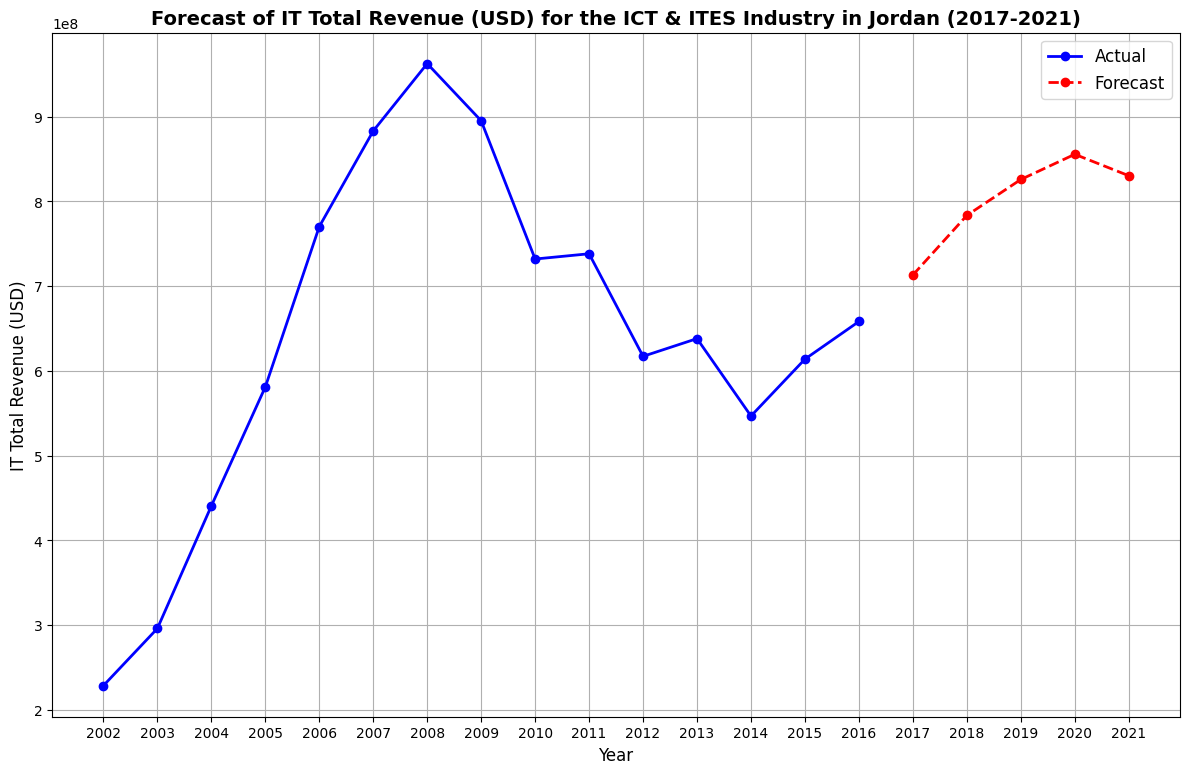

In [82]:
# Plot the forecast
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
plt.plot(df.index, df['IT Total Revenue (USD)'], label='Actual', marker='o', color='blue', linewidth=2)  # Adjust marker and line style
plt.plot(np.arange(2017, 2022), forecast, label='Forecast', linestyle='--', marker='o', color='red', linewidth=2)  # Adjust marker and line style
plt.xlabel('Year', fontsize=12)  # Increase font size for axis labels
plt.ylabel('IT Total Revenue (USD)', fontsize=12)  # Increase font size for axis labels
plt.title('Forecast of IT Total Revenue (USD) for the ICT & ITES Industry in Jordan (2017-2021)', fontsize=14, fontweight='bold')  # Improve title with more details
plt.xticks(np.arange(2002, 2022, step=1))  # Adjust x-axis ticks for better readability
plt.legend(fontsize=12)  # Increase font size for legend
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
